In [425]:
import pandas as pd

df = pd.read_csv(r'C:\Users\amitw\Downloads\reviews-up.csv', encoding='ISO-8859-1')

In [427]:
df.shape

(1943, 2)

In [429]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [431]:
df

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
1938,Over the weekend i watched the movie Tipping t...,1
1939,The Andrew Davies adaptation of the Sarah Wate...,1
1940,Both the book and the film are excellent in th...,1
1941,This BBC series is astonishingly good fun. I'd...,1


In [433]:
X = df.drop('Sentiment',axis = 1)
y = df['Sentiment']

In [295]:
X, y

(                                                   Text
 0     Once again Mr. Costner has dragged out a movie...
 1     This is an example of why the majority of acti...
 2     First of all I hate those moronic rappers, who...
 3     Not even the Beatles could write songs everyon...
 4     Brass pictures (movies is not a fitting word f...
 ...                                                 ...
 1938  Over the weekend i watched the movie Tipping t...
 1939  The Andrew Davies adaptation of the Sarah Wate...
 1940  Both the book and the film are excellent in th...
 1941  This BBC series is astonishingly good fun. I'd...
 1942  When I rented this movie, I half expected it t...
 
 [1943 rows x 1 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1938    1
 1939    1
 1940    1
 1941    1
 1942    1
 Name: Sentiment, Length: 1943, dtype: int64)

In [435]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amitw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [437]:
df.reset_index(inplace = True) # dropped null values so need to reset index 

In [439]:
len(X)

1943

In [441]:
y.shape

(1943,)

In [443]:
# #Data preprocessing
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

In [445]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [447]:
## using Stemming
corpus = []
for i in range(0,len(X)):
    rvw = re.sub('[^a-zA-Z]', ' ',X['Text'][i])
    rvw = rvw.lower()
    rvw = rvw.split()
    # rvw = [ps.stem(words) for words in rvw if not words in stopwords.words('english')]
    rvw = [lemmatizer.lemmatize(words) for words in rvw if words not in set(stopwords.words('english'))]
    # rvw = [lemmatizer.lemmatize(word) for word in rvw if word not in set(stopwords.words('english'))]
    

    # 
    rvw = ' '.join(rvw)
    print(i)
    corpus.append(rvw)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [533]:
## onehot
from tensorflow.keras.preprocessing.text import one_hot
voc_size=10000
# one hot encoding
ohe_rpr = [one_hot(words,voc_size) for words in corpus]
ohe_rpr
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Embedding Representaion
sent_length = 20
emb = pad_sequences(ohe_rpr,padding = 'pre',maxlen = sent_length)

print(len(ohe_rpr))
emb
# emb = emb.reshape(emb.shape[0], emb.shape[1], 1)

1943


array([[ 882, 9010, 3910, ..., 8477, 2559, 2598],
       [8341,  781, 8341, ..., 9912, 7686, 5417],
       [8446, 8891, 2452, ..., 8838, 4966, 2510],
       ...,
       [1761, 1308, 5321, ..., 6543, 7630, 9734],
       [2649, 6418, 8929, ..., 3582,  202, 8870],
       [5219, 9683, 2187, ..., 9511, 1767, 9989]])

In [503]:
#TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
voc_size=10000
sent_length=20
vectorizer = TfidfVectorizer(max_features=sent_length)
X = vectorizer.fit_transform(corpus)



X_array = X.toarray()

# Print TF-IDF array
print("TF-IDF Array:")
print('X_array',X_array.shape)

# Padding sequences

emb = pad_sequences(X_array, maxlen=sent_length, padding='pre', dtype='float32')

# Print padded sequences
# print("\nPadded TF-IDF Sequences:")
print(X.shape)


print('emb',emb.shape)
emb

TF-IDF Array:
X_array (1943, 20)
(1943, 20)
emb (1943, 20)


array([[0.        , 0.77622145, 0.        , ..., 0.2908067 , 0.2733016 ,
        0.        ],
       [0.        , 0.40999255, 0.        , ..., 0.        , 0.14435522,
        0.        ],
       [0.        , 0.5601295 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.45721626],
       [0.        , 0.3055963 , 0.        , ..., 0.        , 0.        ,
        0.313227  ],
       [0.        , 0.        , 0.        , ..., 0.24328138, 0.        ,
        0.        ]], dtype=float32)

In [87]:
###Word2vec
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
tokenized_corpus = [sentence.lower().split() for sentence in corpus]
# Define Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)
# Convert sentences to vectors
def sentence_to_vectors(sentence, model, vector_size):
    return [model.wv[word] if word in model.wv else np.zeros(vector_size) for word in sentence]

# Get vector size from the model
vector_size = w2v_model.vector_size

# Convert each sentence to vectors
vectorized_corpus = [sentence_to_vectors(sentence, w2v_model, vector_size) for sentence in tokenized_corpus]
# Define the desired sentence length
sent_length = 20

# Pad the sequences
padded_sequences = pad_sequences(vectorized_corpus, maxlen=sent_length, padding='pre', dtype='float32', value=np.zeros(vector_size))

# Convert padded_sequences to a numpy array
padded_sequences = np.array(padded_sequences)

# Flatten the 3D word embeddings to 2D
flattened_sequences = padded_sequences.reshape(padded_sequences.shape[0], -1)

print(flattened_sequences.shape)  # Should be (number of sentences, sent_length * vector_size)



(1943, 2000)


In [523]:
### Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X_array = X.toarray()
# Define the desired sentence length
sent_length = 20

# Pad the sequences
emb = pad_sequences(X_array, maxlen=sent_length, padding='pre', dtype='float32')

# Print the shape of the padded sequences
print(emb.shape)  # Should be (number of sentences, sent_length)
emb


(1943, 20)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [479]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Dropout

model = Sequential([
    Input(shape=(20,)),
    Embedding(input_dim=voc_size, output_dim=40),  # Example input dimensions
    Dropout(0.5),
    # Dense(10, activation='relu'),
    LSTM(400, return_sequences=True),
    Dropout(0.5),
    LSTM(300),
    # Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 20, 40)         │       400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 20, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 20, 400)        │       705,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 20, 400)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 300)            │       841,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,947,101 (7.43 MB)

 Trainable params: 1,947,101 (7.43 MB)

 Non-trainable params: 0 (0.00 B)

In [535]:
import numpy as np
x_fin = np.array(emb)
y_fin = np.array(y)

In [553]:
x_fin

array([[ 882, 9010, 3910, ..., 8477, 2559, 2598],
       [8341,  781, 8341, ..., 9912, 7686, 5417],
       [8446, 8891, 2452, ..., 8838, 4966, 2510],
       ...,
       [1761, 1308, 5321, ..., 6543, 7630, 9734],
       [2649, 6418, 8929, ..., 3582,  202, 8870],
       [5219, 9683, 2187, ..., 9511, 1767, 9989]])

In [583]:
from sklearn.model_selection import train_test_split
xtr,xtst,yrt,ytst = train_test_split(x_fin,y_fin,test_size=0.33,random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [557]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(xtr)
# X_val_scaled = scaler.transform(xtst)

In [585]:
#model Training
history=model.fit(xtr,yrt,validation_data=(xtst,ytst),epochs = 10,batch_size = 32)

#history=model.fit(X_train_scaled,yrt,validation_data=(X_val_scaled,ytst),epochs = 10,batch_size = 32)
# model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, batch_size=32)

# Evaluate model performance
# loss, accuracy = history.evaluate(X_val_scaled, ytst)
# print(f'Validation Accuracy: {accuracy}')

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.6129 - loss: 0.5831 - val_accuracy: 0.6651 - val_loss: 0.9213
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9695 - loss: 0.1121 - val_accuracy: 0.6947 - val_loss: 0.9789
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9742 - loss: 0.0822 - val_accuracy: 0.6885 - val_loss: 0.7706
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.9926 - loss: 0.0409 - val_accuracy: 0.6963 - val_loss: 1.5071
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9959 - loss: 0.0055 - val_accuracy: 0.7103 - val_loss: 1.3642
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.7103 - val_loss: 1.1508
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9998 - loss: 0.0030 - val_accuracy: 0.6994 - val_loss: 1.9824
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 1.0000 - loss: 5.0172e-04 - val_accuracy

In [587]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [589]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [591]:
history.history.items()

dict_items([('accuracy', [0.7770945429801941, 0.9769408106803894, 0.9707916975021362, 0.9953881502151489, 0.996925413608551, 0.996925413608551, 0.9992313385009766, 1.0, 1.0, 1.0]), ('loss', [0.4307882487773895, 0.09451528638601303, 0.09021541476249695, 0.021094288676977158, 0.005209889262914658, 0.008942007087171078, 0.0024385605938732624, 0.0004993578768335283, 0.0002793647872749716, 0.0003919161681551486]), ('val_accuracy', [0.6651090383529663, 0.6947040557861328, 0.6884735226631165, 0.6962617039680481, 0.7102803587913513, 0.7102803587913513, 0.6993769407272339, 0.7087227702140808, 0.7102803587913513, 0.7102803587913513]), ('val_loss', [0.9213342666625977, 0.9789201617240906, 0.7705850005149841, 1.507066011428833, 1.3642343282699585, 1.1508150100708008, 1.982409954071045, 1.655606746673584, 1.8101513385772705, 1.8696733713150024])])

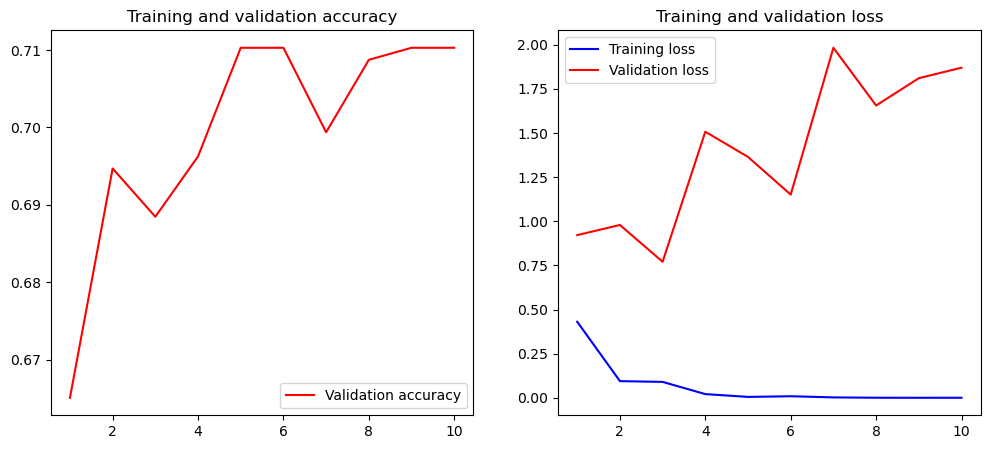

In [593]:
import matplotlib.pyplot as plt
plot_history(history)

In [680]:
xtst

array([[2454, 3243, 1746, ..., 4882, 3324, 4730],
       [ 125, 1046,  125, ..., 2510, 4415, 2313],
       [ 738,  711, 1748, ..., 1370, 4977, 3979],
       ...,
       [1096, 1065, 2765, ..., 3206, 1014, 4836],
       [2175, 2171, 4507, ..., 3385, 1954, 2730],
       [2835, 2511,  923, ..., 3820, 1816, 3536]])

In [595]:
yp = model.predict(xtst)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [597]:
pp = np.where(yp>=0.5,1,0)


In [599]:
xtst.shape

(642, 20)

In [601]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(ytst,pp)

array([[245,  82],
       [104, 211]], dtype=int64)

In [603]:
accuracy_score(ytst,pp)

0.7102803738317757

In [1142]:
classification_report(ytst,ypp)

'              precision    recall  f1-score   support\n\n           0       0.68      0.73      0.70       327\n           1       0.70      0.64      0.67       315\n\n    accuracy                           0.69       642\n   macro avg       0.69      0.69      0.69       642\nweighted avg       0.69      0.69      0.69       642\n'

In [1144]:
cleaned_text = 'boring food and fantastic service!'

##Positove - 'Delightful food and fantastic service!'


In [1146]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus1 = []
for i in range(0,len(cleaned_text)):
    print(i)
    print(cleaned_text)
    rvw = re.sub('[^a-zA-Z]', ' ',cleaned_text)
    rvw = rvw.lower()
    rvw = rvw.split()

    rvw = [ps.stem(words) for words in rvw if not words in stopwords.words('english')]
    rvw = ' '.join(rvw)
    corpus1.append(rvw)

ohe_rpr1 = [one_hot(words,voc_size) for words in corpus1]

sent_length = 20
emb1 = pad_sequences(ohe_rpr1,padding = 'pre',maxlen = sent_length)
emb1

0
boring food and fantastic service!
1
boring food and fantastic service!
2
boring food and fantastic service!
3
boring food and fantastic service!
4
boring food and fantastic service!
5
boring food and fantastic service!
6
boring food and fantastic service!
7
boring food and fantastic service!
8
boring food and fantastic service!
9
boring food and fantastic service!
10
boring food and fantastic service!
11
boring food and fantastic service!
12
boring food and fantastic service!
13
boring food and fantastic service!
14
boring food and fantastic service!
15
boring food and fantastic service!
16
boring food and fantastic service!
17
boring food and fantastic service!
18
boring food and fantastic service!
19
boring food and fantastic service!
20
boring food and fantastic service!
21
boring food and fantastic service!
22
boring food and fantastic service!
23
boring food and fantastic service!
24
boring food and fantastic service!
25
boring food and fantastic service!
26
boring food and fan

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 8544, 9160, 6051, 5373],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 8544, 9160, 6051, 5373],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 8544, 9160, 6051, 5373],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 8544, 9160, 6051, 5373],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 8544, 9160, 6051, 5373],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 8544, 9160, 6051, 5373],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 8544, 9160, 6051, 5373],
       [   0,    0,    0,    0,    0,    

In [1002]:
model.predict(emb1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821],
       [0.9997821]], dtype=float32)

NameError: name 'padded_sequence' is not defined

In [712]:
ypp = np.where(ypp>=0.5,1,0)

In [714]:
ypp

array(1)

In [1160]:
## using Stemming
Input_text='Delightful life'

corpus_p = []
for i in range(0,len(Input_text)):
    rvw = re.sub('[^a-zA-Z]', ' ',Input_text)
    rvw = rvw.lower()
    rvw = rvw.split()
    # rvw = [ps.stem(words) for words in rvw if not words in stopwords.words('english')]
    rvw = [lemmatizer.lemmatize(words) for words in rvw if words not in set(stopwords.words('english'))]
    # rvw = [lemmatizer.lemmatize(word) for word in rvw if word not in set(stopwords.words('english'))]
    

    # 
    rvw = ' '.join(rvw)
    print(i)
    corpus_p.append(rvw)

from tensorflow.keras.preprocessing.text import one_hot
voc_size=10000
# one hot encoding
ohe_rpr_2 = [one_hot(words,voc_size) for words in corpus_p]

from tensorflow.keras.preprocessing.sequence import pad_sequences
#Embedding Representaion
sent_length = 20
emb2 = pad_sequences(ohe_rpr_2,padding = 'pre',maxlen = sent_length)
# emb = emb.reshape(emb.shape[0], emb.shape[1], 1)
emb2.shape

import numpy as np
x_fin = np.array(emb2)
ypp1=model.predict(emb2)
ypp1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168],
       [0.00286168]], dtype=float32)

In [1162]:

ypp1 = np.where(yp>=0.5,1,0)
ypp1

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [1164]:
ypp1[0][0]

1